# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [1]:
import requests
import requests_cache
from urlparse import urlunparse, urlparse
import pandas as pd
# Set up a cache for requests.
requests_cache.install_cache("cache")
key = "HwyOBVU5rcviLL3vPvvL9EHaQWEdMMoh3Tw6yU7Z"

In [2]:
def ndb_search(item):
    """
    input: name of the item. e.g: 'quail eggs'
    output: list
    """
    urll = list(urlparse("https://api.nal.usda.gov/ndb/search/?format=json&q=butter&sort=n&max=25&offset=0&api_key=DEMO_KEY"))
    #method = "ed/collegescorecard/v1/schools.json"
    params = "format=json&q={}&sort=n&max=25&offset=0&api_key=HwyOBVU5rcviLL3vPvvL9EHaQWEdMMoh3Tw6yU7Z".format(item)
    urll[4] = params
    response = requests.get(urlunparse(urll))
    # if there is no item in my search 
    if response.json().keys()==[u'errors']:
        # print out the error message
        return response.json()[u'errors'][u'error'][0][u'message']
    # convert the output of ndb_search() to a data frame with pd.DataFrame()
    else: 
        results = response.json()[u'list'][u'item']
        return results

In [3]:
ndb_search("quail eggs")

[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 2},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 4},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 5}]

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

<pre>(1) the foods are all raw and unbranded
 1. so do I need to add "raw" for search?
    If I do not add "raw" and search for cabbage, there will be results like :"Cabbage,             kimchi". kimchi is not a raw food.
    Also, there are some name with "raw" and "juice". Apparently "juice" is not a fresh food.       We should drop these rows. 
 2. how to define unbranded items? 
    2.1 if the fruit is unbranded, the group column will have value "Fruits and Fruit Juices"       or "Vegetables and Vegetable Products". 
    2.2 But there are also exceptions like "American Indian/Alaska Native Foods".
    2.3 for banded item, the value in group column will be "Branded Food Products Database"
 3. if there is nothing find in the website by using "food(the fresh name) raw", try to find others
 4. sometimes there will return multiple ndb numbers. Try to find the one that best matches food.
   </pre>

In [4]:
# make some change of the ndb_search() function
def ndb_search(item):
    """
    input: name of the item. e.g: 'quail eggs'
    output: dataframe with ndb numbers
    """
    urll = list(urlparse("https://api.nal.usda.gov/ndb/search/?format=json&q=butter&sort=n&max=25&offset=0&api_key=DEMO_KEY"))
    #method = "ed/collegescorecard/v1/schools.json"
    params = "format=json&q={}&sort=n&max=25&offset=0&api_key=HwyOBVU5rcviLL3vPvvL9EHaQWEdMMoh3Tw6yU7Z".format(item)
    urll[4] = params
    response = requests.get(urlunparse(urll))
    # if there is no item in my search 
    if response.json().keys()==[u'errors']:
        # print out the error message
        return response.json()[u'errors'][u'error'][0][u'message']
    # convert the output of ndb_search() to a data frame with pd.DataFrame()
    else: 
        results = response.json()[u'list'][u'item']
        return pd.DataFrame(results)

In [162]:
fresh = pd.read_csv("fresh.csv")
print fresh.shape
print len(fresh.food.unique())
# results below shows that there are 47 unique food names however, there are 49 rows in fresh dataset.
# By taking a look of the fresh dataframe, we know "cucumbers" and "cabbage" are the two items that got repeated.
print fresh[fresh["food"]=="cucumbers"].index.tolist()
fresh = fresh.drop(26)
print fresh[fresh["food"]=="cabbage"].index.tolist()
fresh = fresh.drop(36)

(49, 7)
47
[25, 26]
[36, 37]


In [163]:
import re
def get_food(item):
    # only return the foods which are raw and unbranded
    tb = ndb_search(item+" "+"raw")
    if not type(tb) == unicode: # when type(tb) == unicode, tb has value "u'Your search resulted in zero results.Change your parameters and try again'"
        tb_n = tb[(~tb.group.str.contains("Branded")) & ((tb.group.str.contains("Fruit")) | (tb.group.str.contains("Vegetable")))&(~tb.name.str.contains("juice"))].copy()
        if not tb_n.empty:
            #print type(re.search("^([0-9]+)(\s)+([0-9]+).*",str(tb_n.iloc[0:1,3])).group(3))
            # type of tb_n.iloc[0:1,3]], I can not extract the number directly
            # "\s" means space
            tb_n1 = pd.DataFrame({"ndbno": re.search("^([0-9]+)(\s)+([0-9]+).*",str(tb_n.iloc[0:1,3])).group(3),"food":[item]}) 
            # if i do not use regular expression, use df.x.str.strip("0characters") and ("change to numeric": pd.to_numeric(df.x) x column in df)  
            #tb_n1 = pd.DataFrame({"ndbno": pd.to_numeric(tb_n.iloc[0:1,3]),"food":[item]}) 
            # but return to numeric is not a good method because for string "09876" it will turn to be 9876. But what we want is exactly "09876"
            #tb_n1 = pd.DataFrame({"ndbno": tb_n.ndbno.str.split("\s"),"food":[item]}) 
            # when I want to make a dataframe and there is only one object, I need to use ["the value"]. otherwise, there will be error
            #tb_n1["fresh"] = item
            return tb_n1
dbn_fresh = pd.concat([get_food(x) for x in fresh["food"]])
print dbn_fresh

               food  ndbno
0        watermelon  09326
0        cantaloupe  09181
0        tangerines  09218
0      strawberries  09140
0             plums  09061
0           oranges  09216
0       raspberries  09302
0       pomegranate  09286
0         pineapple  09266
0          apricots  09021
0          honeydew  09184
0            papaya  09226
0          cherries  09001
0           bananas  09040
0            apples  09504
0           peaches  09236
0        nectarines  09191
0             pears  09427
0        grapefruit  09112
0      blackberries  09042
0            grapes  11974
0       blueberries  09050
0           mangoes  09176
0         asparagus  11011
0         cucumbers  11206
0   lettuce_iceberg  11252
0            onions  11282
0     turnip_greens  11568
0    mustard_greens  11270
0          potatoes  11352
0           cabbage  11116
0    sweet_potatoes  11505
0            radish  11430
0          avocados  09037
0              kale  11233
0         artichoke  11007
0

In [197]:
fresh

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit


In [229]:
# merge this two tables
fresh_n = pd.merge(fresh,dbn_fresh,how="right")
fresh_n.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,09326
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,09181
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,09218
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit,09140
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit,09061


__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [165]:
def ndb_report(ndb):
    """
    input: name of the ndb. e.g: '09279'
    output: list of nutritions
    """
    url = "https://api.nal.usda.gov/ndb/V2/reports"
    response = requests.get(url, params = {
        "api_key": "HwyOBVU5rcviLL3vPvvL9EHaQWEdMMoh3Tw6yU7Z",
        "ndbno": ndb
        #"type": "b"
        #"format":"json"
    })
    # if there is no item in my search 
    if response.json().keys()==[u'errors']:
        # print out the error message
        return response.json()[u'errors'][u'error'][0][u'message']
    # convert the output of ndb_search() to a data frame with pd.DataFrame()
    else: 
        results = response.json()[u'foods'][0][u'food'][u'nutrients']
        return results

In [166]:
pd.DataFrame(ndb_report("11098")).head()

,group,measures,name,nutrient_id,unit,value
0,Proximates,"[{u'eunit': u'g', u'eqv': 88.0, u'qty': 1.0, u...",Water,255,g,86.00
1,Proximates,"[{u'eunit': u'g', u'eqv': 88.0, u'qty': 1.0, u...",Energy,208,kcal,43
2,Proximates,"[{u'eunit': u'g', u'eqv': 88.0, u'qty': 1.0, u...",Protein,203,g,3.38
3,Proximates,"[{u'eunit': u'g', u'eqv': 88.0, u'qty': 1.0, u...",Total lipid (fat),204,g,0.30
4,Proximates,"[{u'eunit': u'g', u'eqv': 88.0, u'qty': 1.0, u...","Carbohydrate, by difference",205,g,8.95


__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

<pre><h3>1.Add a column that named "nutrition"? </h3>
    <p>no, there are many kinds of nutrition. I will choose those noramlly shown in the package: protein; Carbohydrate; Sodium; cholesterol; Energy</p>
<h3>2. do I need to transfer the unit here? </h3>
    <p>Yes: compare the same thing with the same unit</p>
<h3>3. what kinds of plots should I use? barplot? scatter plot(fruits and veg)?</h3>
    <p>3.1 barplots: (protein; Carbohydrate; Sodium; cholesterol; Energy), price and yield for each fruit and vegetable.</p>
    <p>3.2 scatter plots: make pairwise comparison (e.g energy vs price) for different groups (e.g fruits vs vegetables)</p>
    <p>3.3 plot the distribution of one quantity for different groups. The way of creating groups is based on the results we have before. (e.g we already know berry has higher price then other fruits. We can divide fruits into berries and notberries) </p>
</pre>


In [231]:
# the dataframe with fresh name, price, yield is called "fresh_n"
# for create a dataframe for each nutrition: protein, Carbohydrate, Sodium, cholesterol, Energy (be careful about the unit, also make sure the type in each cell is numerical)
 
for y in ["Protein","Carbohydrate","Energy"]:
    locals()['df_{}'.format(y)] = []
    for x in fresh_n["ndbno"]:
        df = pd.DataFrame(ndb_report(x))
        # keep the "ndbno" in the table
        df["ndbno"] = [x]*df.shape[0]
        locals()['df_{}'.format(y)].append(df.loc[df.name.str.contains(y)])
    locals()['nutr_{}'.format(y)] = pd.concat(locals()['df_{}'.format(y)])
    locals()['nutr_{}'.format(y)] = pd.merge(locals()['nutr_{}'.format(y)],fresh_n)

In [232]:
nutr_Protein.head()

,group,measures,name,nutrient_id,unit,value,ndbno,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Proximates,"[{u'eunit': u'g', u'eqv': 154.0, u'qty': 1.0, ...",Protein,203,g,0.61,09326,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit
1,Proximates,"[{u'eunit': u'g', u'eqv': 177.0, u'qty': 1.0, ...",Protein,203,g,0.84,09181,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit
2,Proximates,"[{u'eunit': u'g', u'eqv': 195.0, u'qty': 1.0, ...",Protein,203,g,0.81,09218,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit
3,Proximates,"[{u'eunit': u'g', u'eqv': 244.0, u'qty': 1.0, ...",Protein,203,g,0.58,09140,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit
4,Proximates,"[{u'eunit': u'g', u'eqv': 150.0, u'qty': 1.0, ...",Protein,203,g,0.50,09061,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit


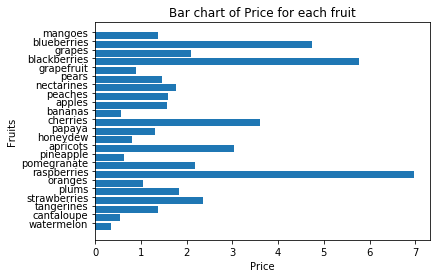

In [235]:
# plot 1: barplot
# Matplotlib
import matplotlib.pyplot as plt
import numpy as np

# for fruits
fresh_f = fresh_n.loc[fresh_n.type.str.contains("fruit")]
def barplt(dataframe,x):
    fig, ax = plt.subplots(1, 1)
    Int = np.arange(dataframe.shape[0])
    bar_width = 0.8
    plt.barh(Int,dataframe[x])
    plt.yticks(Int + bar_width / 2, dataframe["food"])
barplt(fresh_f,"price_per_lb")
plt.xlabel('Price')
plt.ylabel('Fruits')
plt.title('Bar chart of Price for each fruit')
fig.autofmt_xdate()
plt.show()

<p> Plot 1</p>

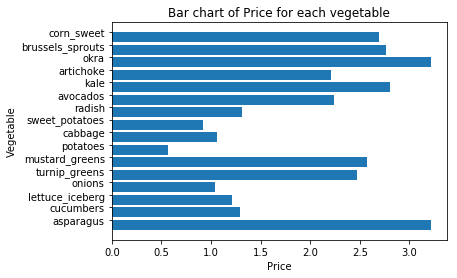

In [236]:
# for vegetables
# for fruits
fresh_v = fresh_n.loc[fresh_n.type.str.contains("vegetable")]

barplt(fresh_v,"price_per_lb")
plt.xlabel("Price")
plt.ylabel('Vegetable')
plt.title('Bar chart of Price for each vegetable')
fig.autofmt_xdate()
plt.show()

<p> Plot 2</p>

<p> By analysing those two plots (plot1 and plot2) we know that most of the fruits and vegetables have price less than \$3 per lb. But there is only okra and asparagus in vegetable have price higher than \$3. For fruits which have relatively higher price are berries, like blueberries, cherries and raspberries.<br> For fruits that have relatively lower prices are some common ones like banana, grapefruit, cantaloupe, watermelon and pineapple. For vegetables, potatoes, sweet-potatoes have the lowest prices.</p> 

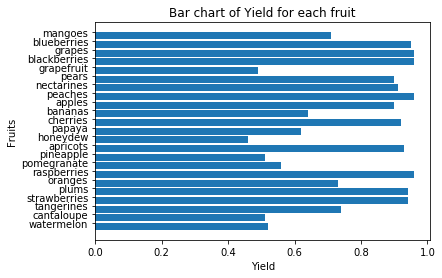

In [238]:
# yield
# for fruits
barplt(fresh_f,"yield")
plt.xlabel('Yield')
plt.ylabel('Fruits')
plt.title('Bar chart of Yield for each fruit')
fig.autofmt_xdate()
plt.show()

<p> Plot 3</p>

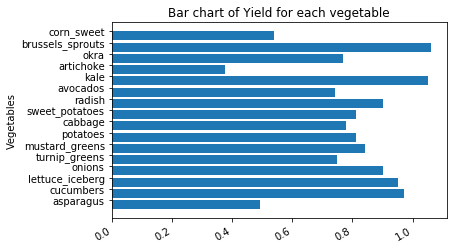

In [218]:
barplt(fresh_v,"yield")
plt.ylabel('Vegetables')
plt.xlabel('Yield')
plt.title('Bar chart of Yield for each vegetable')
fig.autofmt_xdate()
plt.show()

<p> Plot 4</p>

<p> From plot3 we know that for the fruits have lower price like banana, pineapple and grapefruit, they also have lower yields. However, for those berries, they have much higher yields.<br> From plot 4 we know that for vegetables, artichoke has the lowest yield. Brussels sprouts and kale have the highest yields. Kale and artichoke have relatively high price.</p>

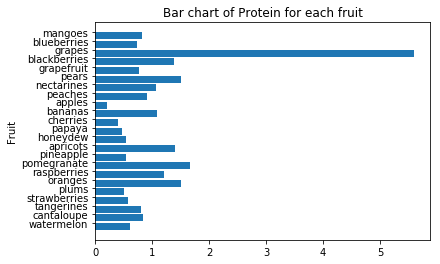

In [240]:
# nutrition content
#(1) protein
pro_f = nutr_Protein.loc[nutr_Protein.type.str.contains("fruit")]
#fresh_v = fresh_n.loc[fresh_n.type.str.contains("vegetable")]
barplt(pro_f,"value")
plt.ylabel('Fruit')
plt.xlabel('Protein')
plt.title('Bar chart of Protein for each fruit')
fig.autofmt_xdate()
plt.show()

<p>Plot 5</p>

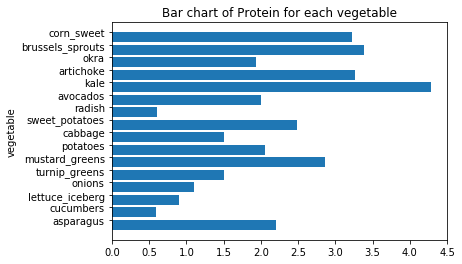

In [241]:
pro_v = nutr_Protein.loc[nutr_Protein.type.str.contains("vegetable")]
barplt(pro_v,"value")
plt.ylabel('vegetable')
plt.xlabel('Protein')
plt.title('Bar chart of Protein for each vegetable')
fig.autofmt_xdate()
plt.show()

<p>Plot 6</p>

<p> From plot 5 we know that most of the protein in fruits are less than 2g. Only grape has the largest protein value which is lager than 5g. <br> From plot 6 we know that there are several vegetables that have protein value larger than 2g. Kale has the largest protein value: 4.3g among vegetables. Corn sweet, brussels sprouts and artichoke also have relatively high protein which are larger than 3g. </p>

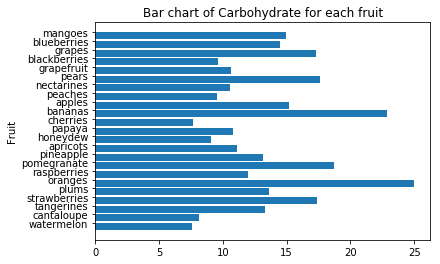

In [243]:
#(2) Carbohydrate
ca_f = nutr_Carbohydrate.loc[nutr_Carbohydrate.type.str.contains("fruit")]
barplt(ca_f,"value")
plt.ylabel('Fruit')
plt.xlabel('Carbohydrate')
plt.title('Bar chart of Carbohydrate for each fruit')
fig.autofmt_xdate()
plt.show()

<p>Plot 7 </p>

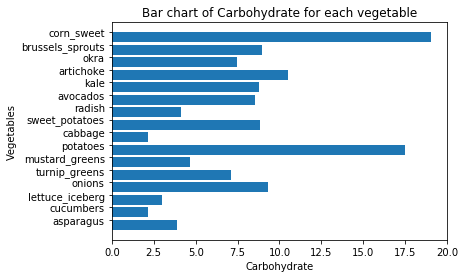

In [244]:
ca_v = nutr_Carbohydrate.loc[nutr_Carbohydrate.type.str.contains("vegetables")]
barplt(ca_v,"value")
plt.ylabel('Vegetables')
plt.xlabel('Carbohydrate')
plt.title('Bar chart of Carbohydrate for each vegetable')
fig.autofmt_xdate()
plt.show()

<p>Plot 8</p>

<p> From plot 7 we know that for all the fruits, the content of Carbohydrate are about the same. Banana and orange have the highest Carbohydrate. Cherries has the lowest.<br> Plot 8 shows that for the vegetables, the content of their Carbohydrate are comparatively lower than fruits. Potatoes and corn sweet have the highest Carbohydrate. Cabbage and cucumbers have the lowest.</p>

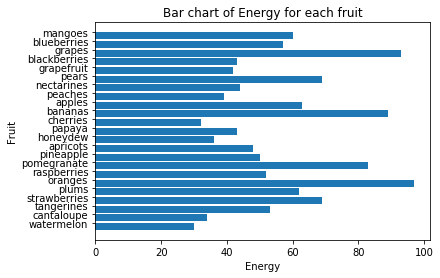

In [245]:
# (3)Energy
en_f = nutr_Energy.loc[nutr_Energy.type.str.contains("fruit")]
barplt(en_f,"value")
plt.ylabel('Fruit')
plt.xlabel('Energy')
plt.title('Bar chart of Energy for each fruit')
fig.autofmt_xdate()
plt.show()

<p> Plot 9</p>

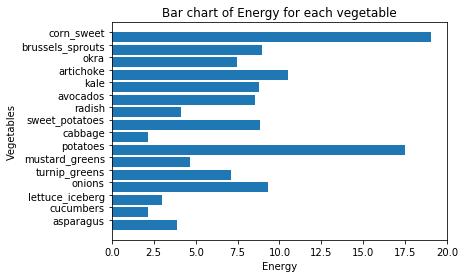

In [246]:
en_v = nutr_Energy.loc[nutr_Energy.type.str.contains("vegetables")]
barplt(ca_v,"value")
plt.ylabel('Vegetables')
plt.xlabel('Energy')
plt.title('Bar chart of Energy for each vegetable')
fig.autofmt_xdate()
plt.show()

<p> Plot 10</p>

<p> By comparing the value of energy in plot 9 and plot 10 we know that fruits have much larger energy than vegetables. For vegetables, corn sweet and potatoes have the largest energy content (about 19 kcal). For the fruits, orange, grape and banana have the largest energy content (about 95 kcal).</p>

<pre> Now, let's summary all the conclusion we have:
<b>(1)Price</b><br>By analysing those two plots (plot1 and plot2) we know that most of the fruits and vegetables have price less than \$3 per lb. But there is only <b>okra</b> and <b>asparagus</b> in vegetable have price higher than \$3. For fruits which have relatively higher price are <b>berries</b>, like <b>blueberries</b>, <b>cherries</b> and <b>raspberries</b>.<br> For fruits that have relatively lower prices are some common ones like <b>banana</b>, <b>grapefruit</b>, <b>cantaloupe</b>, <b>watermelon</b> and <b>pineapple</b>. For vegetables, <b>potatoes</b>, <b>sweet-potatoes</b> have the lowest prices.
<b>(2)Yield</b><br>From plot3 we know that for the fruits have lower price like <b>banana</b>, <b>pineapple</b> and <b>grapefruit</b>, they also have lower yields. However, for those <b>berries</b>, they have much higher yields.<br> From plot 4 we know that for vegetables, <b>artichoke</b> has the lowest yield. <b>Brussels sprouts</b> and <b>kale</b> have the highest yields. <b>Kale</b> and <b>artichoke</b> have relatively high price.
<b>(3)Protein</b><br>From plot 5 we know that most of the protein in fruits are less than 2g. Only <b>grape</b> has the largest protein value which is lager than 5g. <br> From plot 6 we know that there are several vegetables that have protein value larger than 2g. <b>Kale</b> has the largest protein value: 4.3g among vegetables. <b>Corn sweet</b>, <b>brussels sprouts</b> and <b>artichoke</b> also have relatively high protein which are larger than 3g.
<b>(4)Carbohydrate</b><br>From plot 7 we know that for all the fruits, the content of Carbohydrate are about the same. <b>Banana</b> and <b>orange</b> have the highest Carbohydrate. <b>Cherries</b> has the lowest.<br> Plot 8 shows that for the vegetables, the content of their Carbohydrate are comparatively lower than fruits. <b>Potatoes</b> and <b>corn sweet</b> have the highest Carbohydrate. <b>Cabbage</b> and <b>cucumbers</b> have the lowest.
<b>(5)Energy</b><br>By comparing the value of energy in plot 9 and plot 10 we know that fruits have much larger energy than vegetables. For vegetables, <b>corn sweet</b> and <b>potatoes</b> have the largest energy content (about 19 kcal). For the fruits, <b>orange</b>, <b>grape</b> and <b>banana</b> have the largest energy content (about 95 kcal).</pre>

<p> In order to find the best combination of price, yield and nutrition, we want to find the food that have the lowest price, highest nutrition and highest yield. For nutrition content, we want to find a food that has the highest protein, lowest Carbohydrate and highest Energy. Thus, by considering all those aspects, my choice of the best food is among <b>Brussels sprouts</b>, <b>corn sweet</b>, <b>potatoes</b>, <b>banana</b> and <b> grape</b>.